<a href="https://colab.research.google.com/github/amurkhon/MachineLearning-projects/blob/main/Custumer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics

In [2]:
url="https://github.com/anvarnarz/praktikum_datasets/blob/main/E-Commerce-Dataset.xlsx?raw=true"

df = pd.read_excel(url, sheet_name="E Comm")

df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
df.drop('CustomerID', axis=1, inplace=True)

In [4]:
df

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [5]:
df.isnull().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [6]:
df.corrwith(df['Churn']).abs().sort_values(ascending=False)

Churn                          1.000000
Tenure                         0.349408
Complain                       0.250188
DaySinceLastOrder              0.160757
CashbackAmount                 0.154118
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.076630
NumberOfAddress                0.043931
OrderCount                     0.028697
HourSpendOnApp                 0.018675
OrderAmountHikeFromlastYear    0.010058
CouponUsed                     0.008264
dtype: float64

In [7]:
df.drop(['WarehouseToHome','HourSpendOnApp','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','NumberOfAddress','CityTier'], axis=1, inplace=True)

In [8]:
df.isnull().sum()

Churn                         0
Tenure                      264
PreferredLoginDevice          0
PreferredPaymentMode          0
Gender                        0
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
Complain                      0
DaySinceLastOrder           307
CashbackAmount                0
dtype: int64

In [9]:
df

,Churn,Tenure,PreferredLoginDevice,PreferredPaymentMode,Gender,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,Complain,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,Debit Card,Female,3,Laptop & Accessory,2,Single,1,5.0,159.93
1,1,NaN,Phone,UPI,Male,4,Mobile,3,Single,1,0.0,120.90
2,1,NaN,Phone,Debit Card,Male,4,Mobile,3,Single,1,3.0,120.28
3,1,0.0,Phone,Debit Card,Male,4,Laptop & Accessory,5,Single,0,3.0,134.07
4,1,0.0,Phone,CC,Male,3,Mobile,5,Single,0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,Credit Card,Male,2,Laptop & Accessory,1,Married,0,4.0,150.71
5626,0,13.0,Mobile Phone,Credit Card,Male,5,Fashion,5,Married,0,NaN,224.91
5627,0,1.0,Mobile Phone,Debit Card,Male,2,Laptop & Accessory,4,Married,1,4.0,186.42
5628,0,23.0,Computer,Credit Card,Male,5,Laptop & Accessory,4,Married,0,9.0,178.90


In [10]:
df['Churn'].value_counts()/len(df)*100

0    83.161634
1    16.838366
Name: Churn, dtype: float64

In [11]:
churn_rate = df['Churn'].value_counts()/len(df)*100

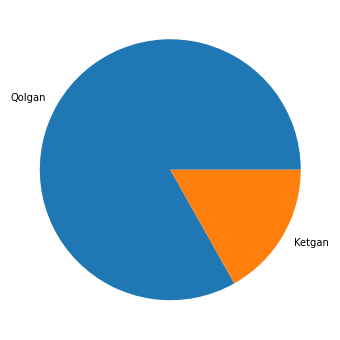

In [12]:
plt.figure(figsize=(9,6))
plt.pie(churn_rate, labels=['Qolgan','Ketgan'])
plt.show()

In [13]:
print(f"Mavjud bo'lmagan qiymatlar soni: {df.isnull().sum().sum()}")
#mavjud bo'lmagan qatorlar soni
missing_rows = df[df.isnull().any(axis=1)].shape[0]
print(f"Mavjud bo'lmagan qatorlar soni: {missing_rows}")
#qatorlar nisbati
print(f"Mavjud bo'lmagan qatorlar %: {np.round(missing_rows/len(df)*100)}%")

Mavjud bo'lmagan qiymatlar soni: 571
Mavjud bo'lmagan qatorlar soni: 571
Mavjud bo'lmagan qatorlar %: 10.0%


In [14]:
df.fillna({'Tenure':np.mean(df['Tenure']).astype(int), 'DaySinceLastOrder':np.mean(df['DaySinceLastOrder']).astype(int)}, inplace=True)

In [15]:
encoded = df.apply(LabelEncoder().fit_transform)
encoded.head()

,Churn,Tenure,PreferredLoginDevice,PreferredPaymentMode,Gender,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,Complain,DaySinceLastOrder,CashbackAmount
0,1,4,1,4,0,2,2,1,2,1,5,1146
1,1,10,2,6,1,3,3,2,2,1,0,68
2,1,10,2,4,1,3,3,2,2,1,3,48
3,1,0,2,4,1,3,2,4,2,0,3,393
4,1,0,2,0,1,2,3,4,2,0,3,330


In [17]:
x = encoded.drop('Churn',axis=1)
y = encoded['Churn'].copy()

In [19]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=0)

# ***Machine Learning***

## **> Logistic Regression**



              precision    recall  f1-score   support

           0       0.89      0.97      0.93       936
           1       0.73      0.38      0.50       190

    accuracy                           0.87      1126
   macro avg       0.81      0.68      0.72      1126
weighted avg       0.86      0.87      0.86      1126

Accuracy Score:  0.872113676731794


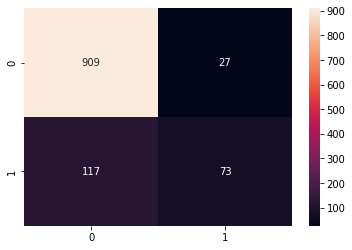

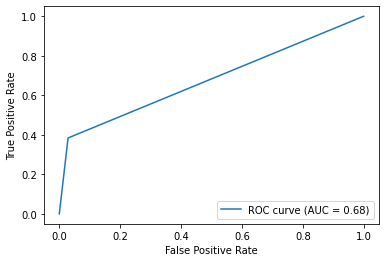

In [23]:
#Creating Model
LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)

#Grading Model
y_predict = LR_model.predict(x_test)
print(metrics.classification_report(y_test,y_predict))
print("Accuracy Score: ", metrics.accuracy_score(y_test, y_predict))

##Grading Model
conf_mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()

##Grading Model
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

## **Supper Vector Machine**

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       936
           1       0.82      0.51      0.63       190

    accuracy                           0.90      1126
   macro avg       0.86      0.74      0.78      1126
weighted avg       0.89      0.90      0.89      1126

Accuracy Score:  0.8978685612788633


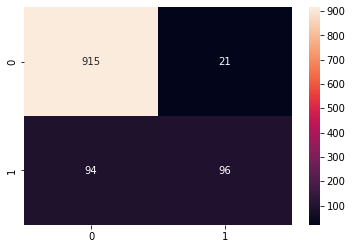

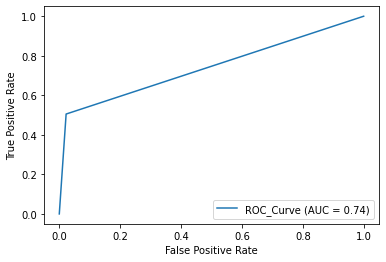

In [26]:
#Creating Model
svm_model = SVC()
svm_model.fit(x_train, y_train)

#Grading Model
y_predict = svm_model.predict(x_test)
print(metrics.classification_report(y_test, y_predict))
print("Accuracy Score: ", metrics.accuracy_score(y_test, y_predict))

##Grading Model
comf_mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(comf_mat, annot=True, fmt='g')
plt.show()

##Grading Model
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC_Curve')
display.plot()
plt.show()

## **Decision Tree**

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       936
           1       0.86      0.87      0.87       190

    accuracy                           0.95      1126
   macro avg       0.92      0.92      0.92      1126
weighted avg       0.96      0.95      0.95      1126

Accuracy Score:  0.9547069271758437


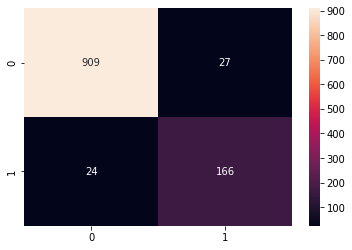

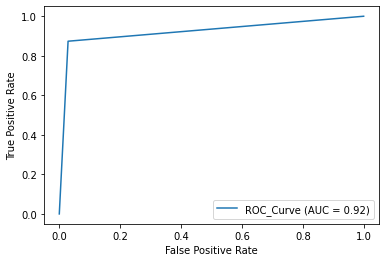

In [29]:
#creating model
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

#grading model
y_predict = tree_model.predict(x_test)
print(metrics.classification_report(y_test, y_predict))
print("Accuracy Score: ", metrics.accuracy_score(y_test, y_predict))

#grading model
comf_mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(comf_mat, annot=True, fmt='g')
plt.show()

#grading model
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC_Curve')
display.plot()
plt.show()

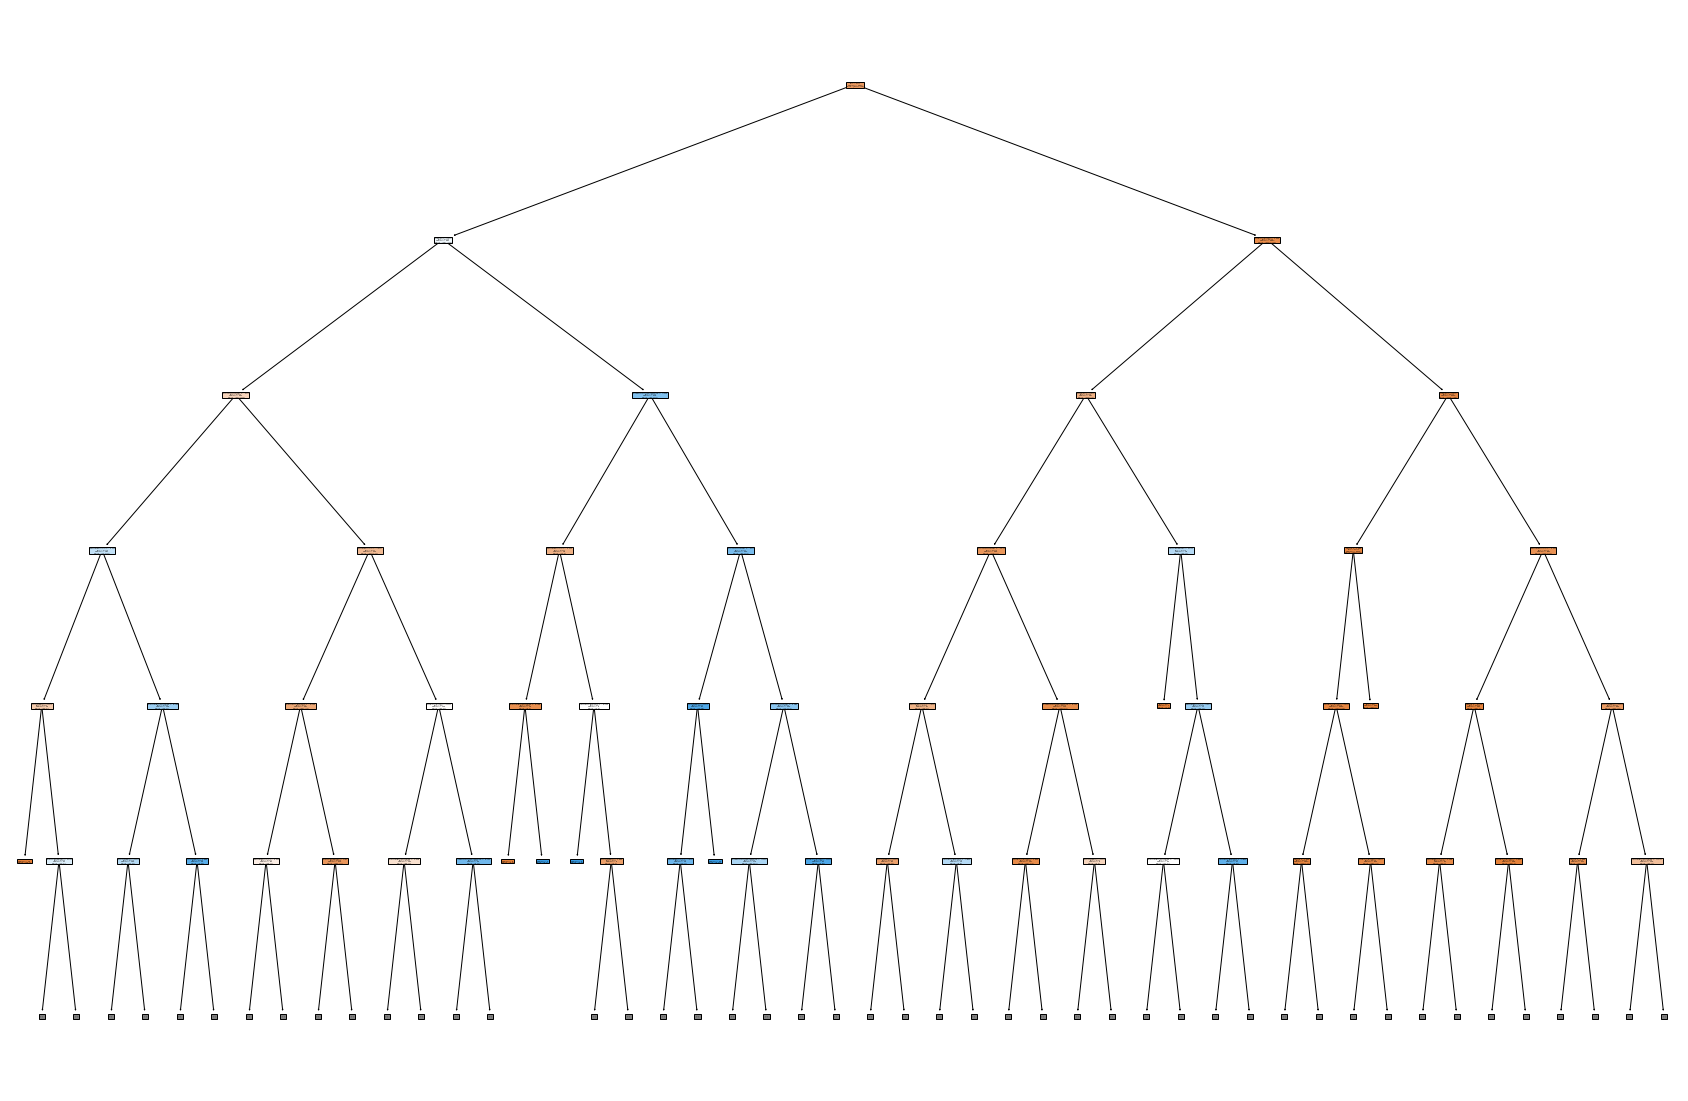

In [33]:
cols = encoded.drop('Churn', axis=1).columns
plt.figure(figsize=(30,20))
plot_tree(tree_model, feature_names=cols, filled=True, max_depth=5)
plt.show()

## **Random Forest**

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       936
           1       0.90      0.85      0.87       190

    accuracy                           0.96      1126
   macro avg       0.93      0.91      0.92      1126
weighted avg       0.96      0.96      0.96      1126

Accuracy Score:  0.9582593250444049


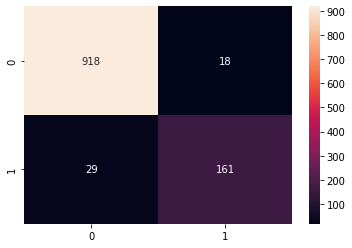

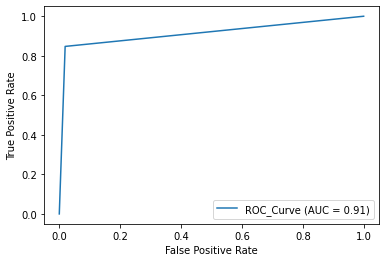

In [35]:
#creating model
RF_model = RandomForestClassifier()
RF_model.fit(x_train, y_train)

#grading model
y_predict = RF_model.predict(x_test)
print(metrics.classification_report(y_test, y_predict))
print("Accuracy Score: ", metrics.accuracy_score(y_test, y_predict))

#grading model
comf_mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(comf_mat, annot=True, fmt='g')
plt.show()

#grading model
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC_Curve')
display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       936
           1       0.75      0.57      0.65       190

    accuracy                           0.90      1126
   macro avg       0.83      0.76      0.79      1126
weighted avg       0.89      0.90      0.89      1126

Accuracy Score:  0.8952042628774423


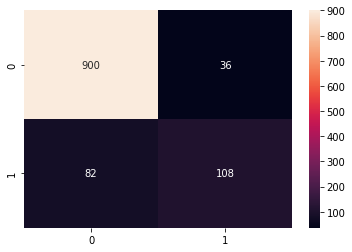

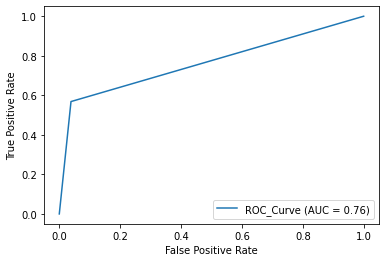

In [37]:
#creating model
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)

#grading model
y_predict = xgb_model.predict(x_test)
print(metrics.classification_report(y_test, y_predict))
print("Accuracy Score: ", metrics.accuracy_score(y_test, y_predict))

#grading model
comf_mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(comf_mat, annot=True, fmt='g')
plt.show()

#grading model
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC_Curve')
display.plot()
plt.show()